# 1. How are coefficients affected?

In [2]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split


In [3]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['TARGET'] = data.target

df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [4]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [5]:
coefs = []
r2_scores_list = []

alphas = [0, 0.1, 1, 10]

for alpha in alphas:
    reg = Lasso(alpha=alpha)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())
    
    y_pred = reg.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores_list.append(score)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

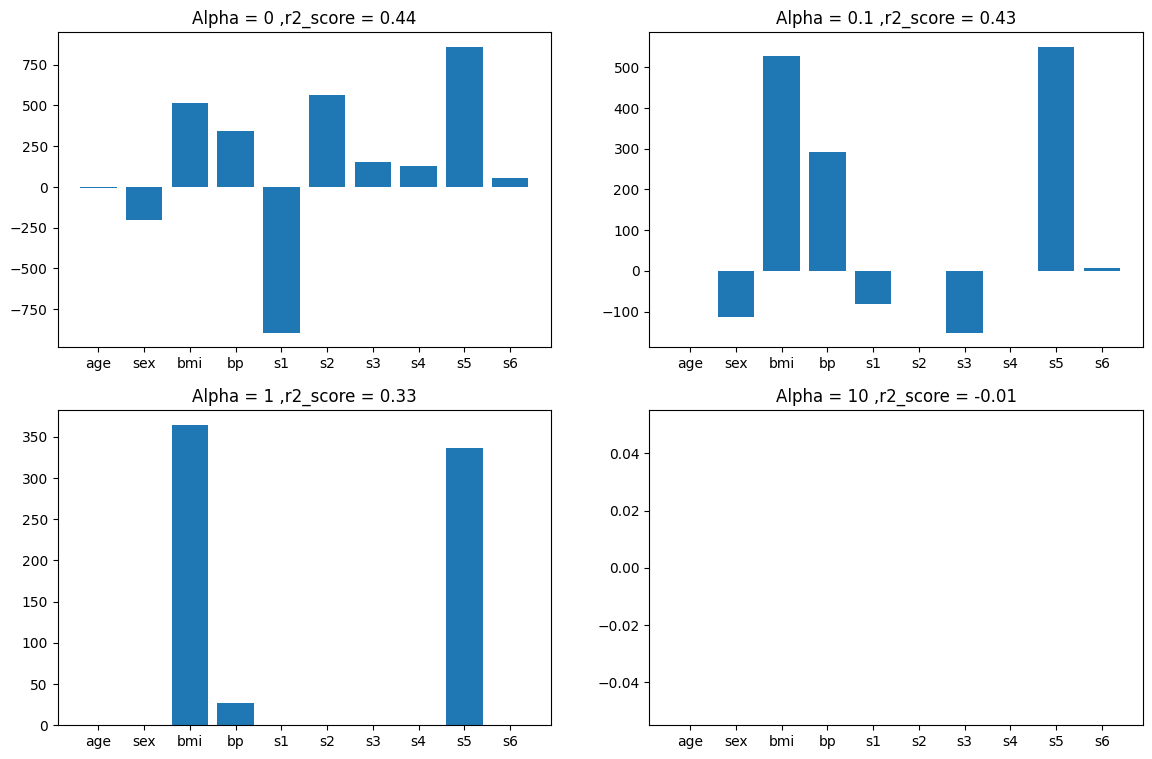

In [6]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores_list[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores_list[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores_list[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores_list[3],2)))

plt.show()

# 2. Higher Coefficients are affected more

In [8]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist()) 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

In [9]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array, columns = data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                  
0.0000     -9.158653 -205.454322  516.693745  340.619999 -895.551989   
0.0001     -9.069064 -205.329406  516.789418  340.532379 -888.660904   
0.0010     -8.262770 -204.205364  517.650073  339.743901 -826.663603   
0.0100     -1.359721 -192.937180  526.356514  332.641101 -430.226975   
0.1000      0.000000 -113.969928  526.744396  292.628472  -82.693681   
1.0000      0.000000    0.000000  363.885742   27.273163    0.000000   
10.0000     0.000000    0.000000    0.000000    0.000000    0.000000   
100.0000    0.000000    0.000000    0.000000    0.000000    0.000000   
1000.0000   0.000000    0.000000    0.000000    0.000000    0.000000   
10000.0000  0.000000    0.000000    0.000000    0.000000    0.000000   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.220669  153.893104  126.731395  861.126997  52.421122  
0.0001      555.958584  150.593655  125.450143  858.645541  52.380294  
0.0010      508.617395  120.908607  113.921773  836.320753  52.012849  
0.0100      191.295480  -44.034913   68.988987  688.396028  47.940616  
0.1000       -0.000000 -152.685338    0.000000  551.080291   7.170992  
1.0000        0.000000   -0.000000    0.000000  336.137262   0.000000  
10.0000       0.000000   -0.000000    0.000000    0.000000   0.000000  
100.0000      0.000000   -0.000000    0.000000    0.000000   0.000000  
1000.0000     0.000000   -0.000000    0.000000    0.000000   0.000000  
10000.0000    0.000000   -0.000000    0.000000    0.000000   0.000000

In [10]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

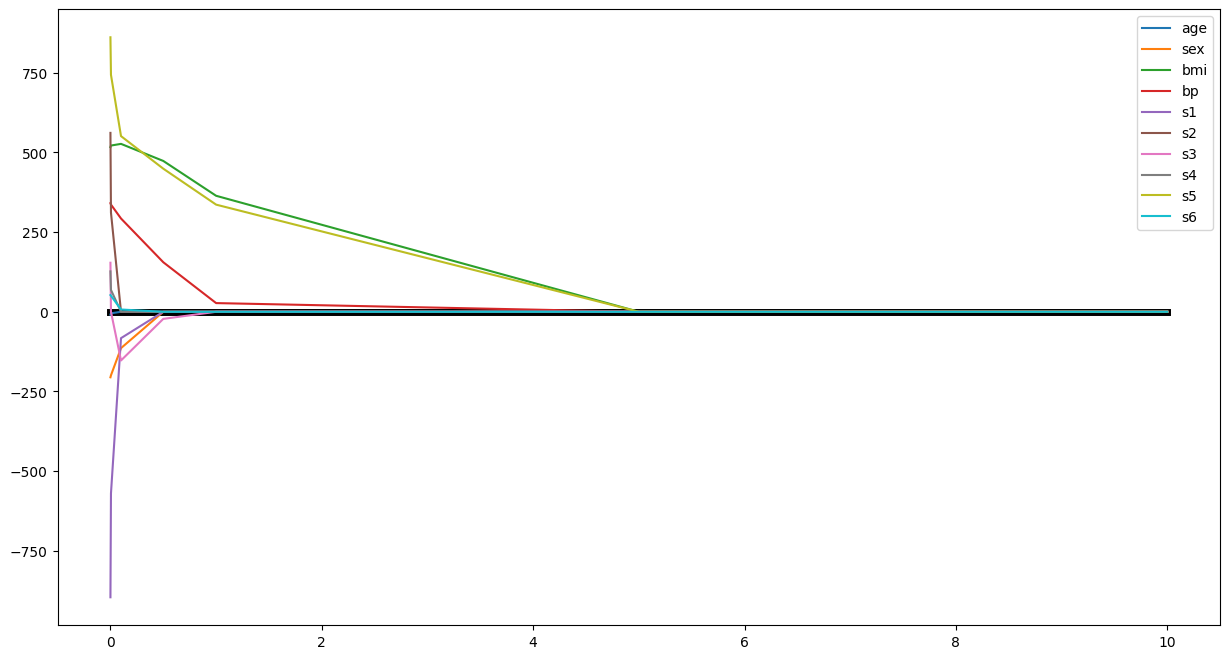

In [11]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

# 3. Impact on Bias and Variance

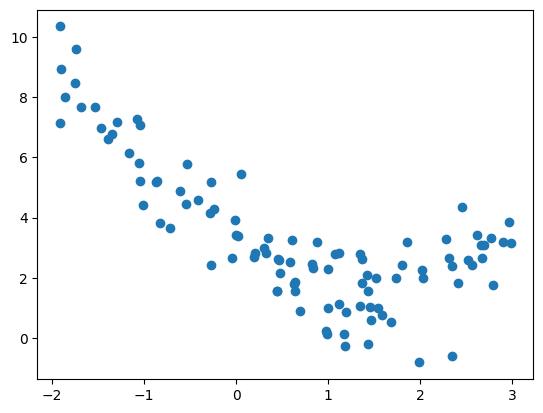

In [13]:
m = 100
X = 5 * np.random.rand(m,1)-2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

````markdown
## Data Generation Explanation (Quadratic with Noise)

```python
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X**2 - 2 * X + 3 + np.random.randn(m, 1)
````

---

### 1. `X = 5 * np.random.rand(m, 1) - 2`

* `np.random.rand(m, 1)`
  একটি `m × 1` আকৃতির matrix তৈরি করে, যার প্রতিটি মান থাকে `[0, 1)` রেঞ্জে।

* `5 * np.random.rand(...)`
  সব মানকে ৫ দিয়ে গুণ করলে নতুন রেঞ্জ হয় `[0, 5)`।

* `- 2`
  রেঞ্জটি আরও সরিয়ে এনে হয় `[−2, 3)`।

**ফলাফল:**
`X` একটি `m × 1` আকৃতির ইনপুট array, যার মানগুলি −2 থেকে 3 এর মধ্যে র‌্যান্ডমভাবে ছড়ানো।

---

### 2. `y = 0.7 * X**2 - 2 * X + 3 + np.random.randn(m, 1)`

এটি একটি **non-linear (quadratic) function** এর উপর ভিত্তি করে তৈরি করা আউটপুট ভ্যালু, যেখানে কিছু **random noise** যুক্ত করা হয়েছে।

* `0.7 * X**2`
  `X` এর স্কয়ার অংশ (quadratic term)।

* `- 2 * X`
  `X` এর linear term।

* `+ 3`
  constant term, যা পুরো ফাংশনকে উপরের দিকে সরায়।

* `+ np.random.randn(m, 1)`
  standard normal distribution থেকে নেয়া `m × 1` আকৃতির noise। এটি `y`-তে বাস্তব জীবনের মত random ভ্যারিয়েশন তৈরি করে।

**ফলাফল:**
`y` একটি `m × 1` আকৃতির target array, যা একটি quadratic function অনুসরণ করে, তবে তাতে কিছু noise যুক্ত রয়েছে।

---

### Summary

| Component | Description                                                                     |
| --------- | ------------------------------------------------------------------------------- |
| `X`       | Random input values in the range \[−2, 3), shape: `(m, 1)`                      |
| `y`       | Corresponding output values from a quadratic equation with added Gaussian noise |

এই ডেটাসেট সাধারণত **polynomial regression** বা **non-linear model fitting** শেখানোর জন্য ব্যবহৃত হয়।

```
```

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size = 0.2, random_state = 4)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.016e+01, tolerance: 3.364e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

````markdown
## Bias-Variance Decomposition for Lasso Regression

```python
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0, 30, 100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123)
    
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)
````

---

### ব্যাখ্যা:

#### `from mlxtend.evaluate import bias_variance_decomp`

* `mlxtend` লাইব্রেরির `bias_variance_decomp` ফাংশনটি ইমপোর্ট করা হয়েছে, যা bias-variance ট্রেডঅফ বিশ্লেষণ করতে ব্যবহৃত হয়।

---

#### `alphas = np.linspace(0, 30, 100)`

* ০ থেকে ৩০ পর্যন্ত ১০০টি সমান ব্যবধানের `alpha` মান তৈরি করা হয়েছে।
* `alpha` হলো Lasso regularization parameter → এর মাধ্যমে আমরা বিভিন্ন লেভেলের model complexity যাচাই করতে পারব।

---

#### `loss = []`, `bias = []`, `variance = []`

* প্রতিটি alpha-এর জন্য তিনটি পরিমাণ সংরক্ষণের জন্য খালি list:

  * `loss`: মোট Mean Squared Error (MSE)
  * `bias`: prediction bias²
  * `variance`: prediction variance

---

#### `for i in alphas:`

* প্রতিটি `alpha` মানের জন্য loop চালানো হচ্ছে।

---

#### `reg = Lasso(alpha=i)`

* নির্দিষ্ট `alpha` দিয়ে Lasso Regression model তৈরি হচ্ছে।

---

#### `bias_variance_decomp(...)`

* এই ফাংশন train/test split-এর উপর নির্ভর করে তিনটি জিনিস রিটার্ন করে:

  1. `avg_expected_loss`: মোট error (bias² + variance + irreducible noise)
  2. `avg_bias`: bias² পরিমাণ
  3. `avg_var`: model-এর output variance

---

#### `loss.append(...)`, `bias.append(...)`, `variance.append(...)`

* প্রতিটি `alpha`-র জন্য গণনা করা মানগুলো আলাদা করে list-এ সংরক্ষণ করা হচ্ছে।

---

### উদ্দেশ্য:

এই কোডের মাধ্যমে আমরা বিভিন্ন `alpha` মানে Lasso Regression মডেলের **bias**, **variance**, এবং **error** কেমন পরিবর্তন হয় তা বিশ্লেষণ করছি — যাতে bias-variance ট্রেডঅফ বোঝা যায়।

---

### পরবর্তী ধাপ (optional):

এই তিনটি তালিকা (list) ব্যবহার করে একটি লাইনে গ্রাফ আঁকা যায়, যা দেখাবে কোন `alpha`-তে কোন পরিমাণ বেশি বা কম।

```python
plt.plot(alphas, loss, label='Total Error (Loss)')
plt.plot(alphas, bias, label='Bias²')
plt.plot(alphas, variance, label='Variance')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.grid(True)
plt.show()
```

```
```

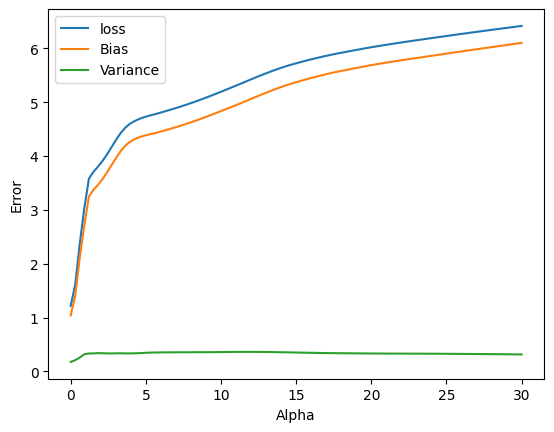

In [47]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.ylabel('Error')

plt.legend()
plt.show() 

# 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


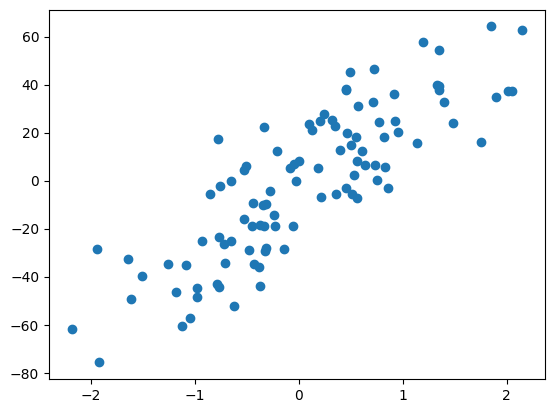

In [54]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features = 1, n_informative =1, n_targets =1, noise = 20, random_state = 13)
plt.scatter(X,y)


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [56]:
def cal_loss(m,alpha):
    return np.sum((y-m*X.ravel()+2.29)**2) + alpha * abs(m)

In [58]:
def predict(m):
    return m*X - 2.29

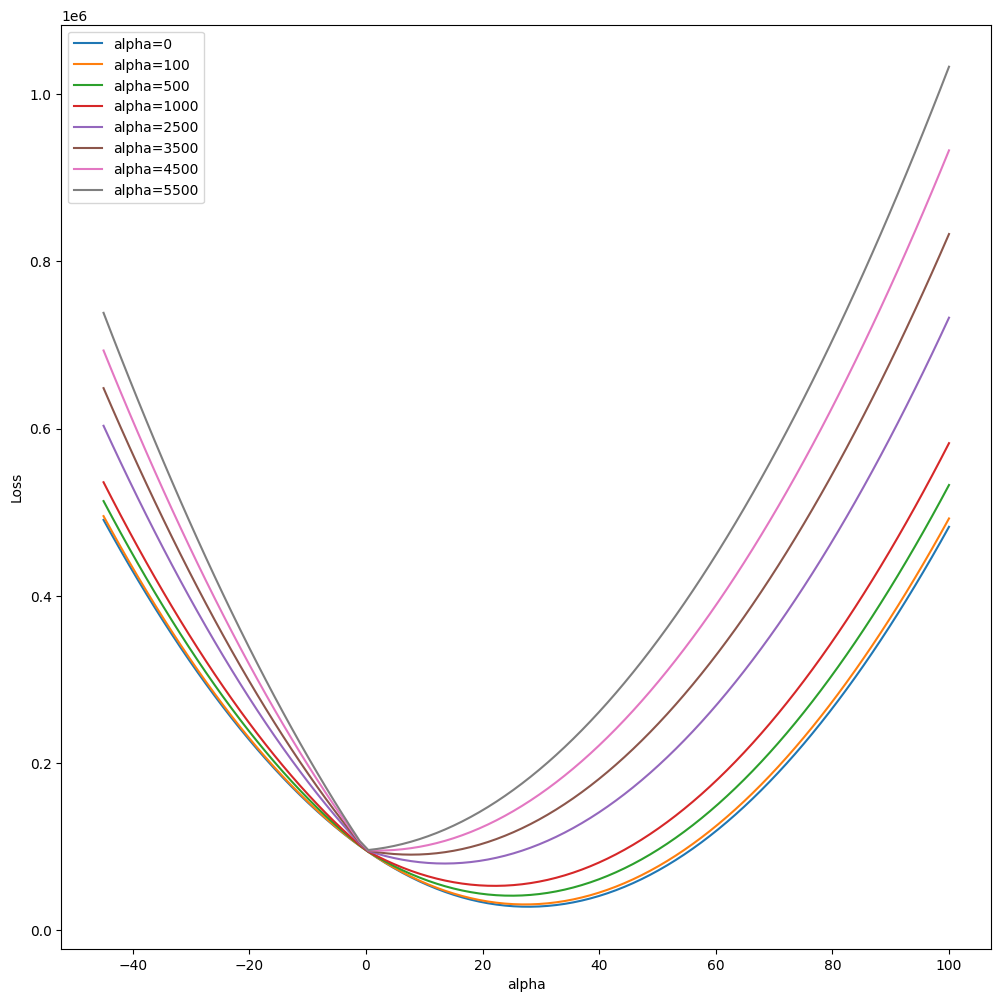

In [72]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label = 'alpha={}'.format(j))


plt.legend()
plt.xlabel('alpha')
plt.ylabel('Loss')
plt.show()

```ekhane basically alpha/lamda er value joto barano hoy coefficient toto e shrink kore and eksomoy zero hoye jay.``` 